# **This jupyter notebook is prepared by Brandon Gibbons**

##1. Load Data and perform basic EDA

###I. import libraries necessary libraries 


In [367]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
from sklearn import ensemble
from sklearn.model_selection import train_test_split

###II.  import the data to a dataframe and show the count of rows and columns (1 pt)


In [368]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hrdata3.csv", index_col=0)
data.shape

(12977, 7)

###III. Show the top 5 and last 5 rows (1 pt)


In [369]:
data.head()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
1,29725,0.776,15,2,5,47,0.0
4,666,0.767,21,2,4,8,0.0
6,28806,0.920,5,2,1,24,0.0
7,402,0.762,13,0,5,18,1.0
8,27107,0.920,7,2,1,46,1.0


In [370]:
data.tail()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
19149,251,0.920,9,2,1,36,1.0
19150,32313,0.920,10,3,3,23,0.0
19152,29754,0.920,7,1,1,25,0.0
19155,24576,0.920,21,2,4,44,0.0
19156,5756,0.802,0,4,2,97,0.0


###IV. Is there any null values on any column?


#### There are no nulls for any column

In [371]:
nulls = data.isnull().mean()
nulls = nulls.to_frame('nulls')
nulls.sort_values('nulls', inplace=True, ascending=False)
nulls

,nulls
enrollee_id,0.0
city_development_index,0.0
experience,0.0
company_size,0.0
last_new_job,0.0
training_hours,0.0
target,0.0


###V. Are all the columns numeric such as float or int? If not, please convert them to numeric (int/float) before going to the next step.

Yes, all columns are float or int.

In [372]:
data.dtypes

enrollee_id                 int64
city_development_index    float64
experience                  int64
company_size                int64
last_new_job                int64
training_hours              int64
target                    float64
dtype: object

###VI.  plot the heatmap with correlations to get some more idea about the data.


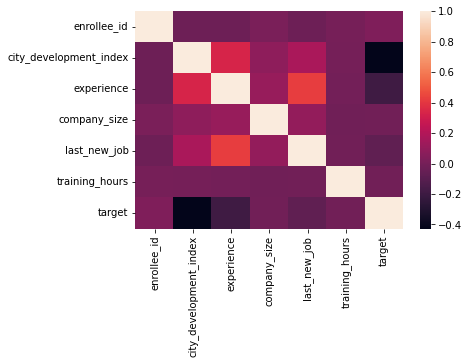

In [373]:
correlation = data.corr()
sns.heatmap(correlation)

##2.   Feature Selection and Pre-processing 


###I. Put all the data from the dataframe into X, except the enrolle_id and the target columns


In [374]:
X = data.drop(columns=['enrollee_id', 'target'])
X

,city_development_index,experience,company_size,last_new_job,training_hours
1,0.776,15,2,5,47
4,0.767,21,2,4,8
6,0.920,5,2,1,24
7,0.762,13,0,5,18
8,0.920,7,2,1,46
...,...,...,...,...,...
19149,0.920,9,2,1,36
19150,0.920,10,3,3,23
19152,0.920,7,1,1,25
19155,0.920,21,2,4,44


###II. Perform feature scaling on the data of X with StandardScaler and show some sample data from X after scaling

In [375]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled = scaler.transform(X)
X = pd.DataFrame(scaled, columns=X.columns, index=X.index)
print(X)

       city_development_index  experience  company_size  last_new_job  \
1                   -0.503422    0.633957     -0.574723      1.690762   
4                   -0.578413    1.546009     -0.574723      1.081137   
6                    0.696434   -0.886130     -0.574723     -0.747739   
7                   -0.620075    0.329940     -1.488268      1.690762   
8                    0.696434   -0.582112     -0.574723     -0.747739   
...                       ...         ...           ...           ...   
19149                0.696434   -0.278095     -0.574723     -0.747739   
19150                0.696434   -0.126086     -0.117951      0.471512   
19152                0.696434   -0.582112     -1.031496     -0.747739   
19155                0.696434    1.546009     -0.574723      1.081137   
19156               -0.286781   -1.646173      0.338822     -0.138113   

       training_hours  
1           -0.308396  
4           -0.951805  
6           -0.687842  
7           -0.786828  
8  

##3. KMeans Clustering


### I. Import related library for Kmeans and perform Kmeans on X (note that it was scaled already). Make sure to put random_state = 47 (it can be any number, but use 47 so that you will produce almost the same result as us). Use k-means++ for the initial centroids. You should know from the problem description how many clusters we are interested in.

In [376]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init = 'k-means++', random_state=47)
kmeans.fit_predict(X)

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

###II. Show the cluster centers as it is and then inverse the scale and show the centers. Please explain in words about the centers relating them to the columns of the data set


####The centers represent each cluster, which correspond to the mean of the points assigned to that cluster.

In [377]:
##kmeans.fit_predict(X)
scaled_clusters = kmeans.cluster_centers_
print(scaled_clusters)

[[-0.31364817 -0.63941844 -0.15207764 -0.55076921  0.01170319]
 [ 0.44177356  0.90062111  0.21420141  0.77575864 -0.01648395]]


In [378]:
unscaled_clusters = scaler.inverse_transform(scaled_clusters)
print(unscaled_clusters)

[[ 0.7987756   6.62300698  2.9252866   1.32309922 66.4026881 ]
 [ 0.88943708 16.75426875  3.72717149  3.49907201 64.69413512]]


###III.  Show the distance matrix


In [379]:
kmeans.transform(X)

array([[2.6387601 , 1.58409296],
       [2.93535149, 1.74579189],
       [1.3371321 , 2.57904978],
       ...,
       [1.51732572, 2.56222519],
       [2.96221279, 1.14612076],
       [1.2962834 , 2.85511871]])

###IV. Show the labels

In [380]:
print(kmeans.labels_)

[1 1 0 ... 0 1 0]


###V. Add a new column to your data frame called cluster_label and assign the cluster label for the instances based on the K-means cluster label

In [381]:
X['cluster_label'] = kmeans.labels_
X

,city_development_index,experience,company_size,last_new_job,training_hours,cluster_label
1,-0.503422,0.633957,-0.574723,1.690762,-0.308396,1
4,-0.578413,1.546009,-0.574723,1.081137,-0.951805,1
6,0.696434,-0.886130,-0.574723,-0.747739,-0.687842,0
7,-0.620075,0.329940,-1.488268,1.690762,-0.786828,1
8,0.696434,-0.582112,-0.574723,-0.747739,-0.324894,0
...,...,...,...,...,...,...
19149,0.696434,-0.278095,-0.574723,-0.747739,-0.489870,0
19150,0.696434,-0.126086,-0.117951,0.471512,-0.704340,1
19152,0.696434,-0.582112,-1.031496,-0.747739,-0.671344,0
19155,0.696434,1.546009,-0.574723,1.081137,-0.357889,1


###VI. The target column of our data frame is floating-point numbers. So, this number is not comparable with the cluster label. Add a column target_int and write a function or use a strategy to store the int version of the target column into the target_int column (For example, 1.0 in the target will be 1 in the target_int, 0.0 will be 0)


In [382]:
X['target_int'] = data['target'].astype(int)

###VII. Show the top 5 rows of the dataframe now that shows you have added those two columns and they have the correct values

In [383]:
print(X.head())

   city_development_index  experience  company_size  last_new_job  \
1               -0.503422    0.633957     -0.574723      1.690762   
4               -0.578413    1.546009     -0.574723      1.081137   
6                0.696434   -0.886130     -0.574723     -0.747739   
7               -0.620075    0.329940     -1.488268      1.690762   
8                0.696434   -0.582112     -0.574723     -0.747739   

   training_hours  cluster_label  target_int  
1       -0.308396              1           0  
4       -0.951805              1           0  
6       -0.687842              0           0  
7       -0.786828              1           1  
8       -0.324894              0           1  


###VIII. Now, we would like to compare the cluster label with the ground truth. Print confusion matrix that compares the target_int and the cluster_label, show the classification_report, and then show the total number of misclassification.


In [384]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(X['target_int'], X['cluster_label']))
print(classification_report(X['target_int'], X['cluster_label']))

misclassifications = (X['target_int'] != X['cluster_label']).sum()
print(misclassifications)

[[5835 4860]
 [1747  535]]
              precision    recall  f1-score   support

           0       0.77      0.55      0.64     10695
           1       0.10      0.23      0.14      2282

    accuracy                           0.49     12977
   macro avg       0.43      0.39      0.39     12977
weighted avg       0.65      0.49      0.55     12977

6607


###IX. Discuss the numbers from 3 Viii and any thoughts on it.


#### The number of misclassifications are very high, which is reflected in only a 50% accuracy score. The number of false negatives are low compared to the rest.

###X. Show the inertia of the cluster


In [385]:
kmeans.inertia_

49643.86379769514

###XI. What is the elbow method and what is its purpose of it in the case of KMeans clustering?


####The elbow method calculates the sum of the square of the points and calculates the average distance. The purpose is to find the best value of K.

###XII. Although we just wanted 2 clusters, we still would like to see what will happen if you increase the number of clusters. Plot the inertia for the different numbers of clusters from 2 to 20. 


Text(0, 0.5, 'WCSS')

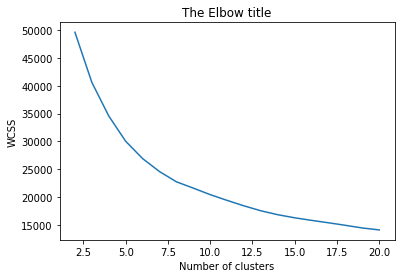

In [386]:
wcss=[]
X_notarget = X.drop(columns=['cluster_label', 'target_int'])
for i in range(2,21):
  kmean = KMeans(i, init = "k-means++")
  kmean.fit(X_notarget)
  wcss_iter = kmean.inertia_
  wcss.append(wcss_iter)

number_clusters = range(2,21)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

###XIII. Show a scatter plot with training hours against experience where the points should be colored based on the two cluster labels. Write any thoughts on this plot.


####There are some obvious misclassifications

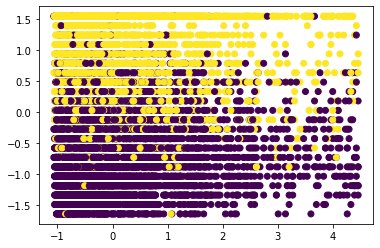

In [389]:
plt.scatter(X['training_hours'], X['experience'], c=kmeans.labels_)
plt.show()

###XIV. Show a scatter plot with any other two attributes you are interested in like 3 Xiii and add your thoughts on your plot as well

City dev index and experience seem to be correlated. 

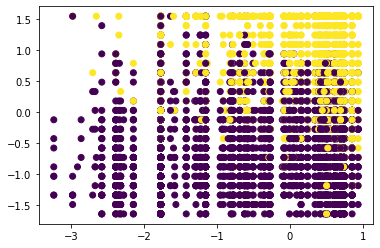

In [391]:
plt.scatter(X['city_development_index'], X['experience'], c=kmeans.labels_)
plt.show()

##4. AgglomerativeClustering

###1. Plot a dendrogram (make the figure size relatively big, but still you will not be able to see it completely. However, it least this will give you an idea on how many cluster would you like to generate)

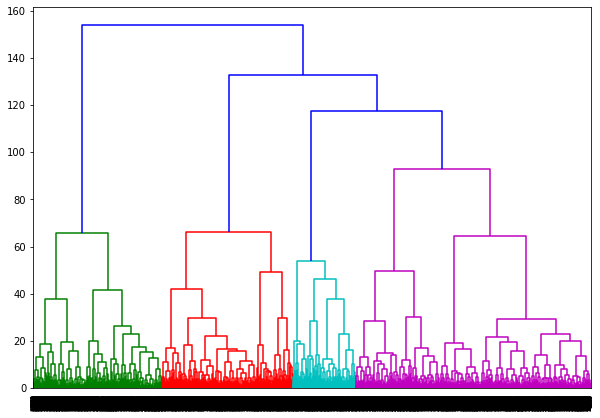

In [392]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(X.drop(columns=['cluster_label', 'target_int']), method='ward'))

###2. Perform AgglomerativeClustering with 2 clusters first, and use euclidean distance for affinity and linkage = 'ward' 


In [395]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X.drop(columns=['cluster_label', 'target_int']))

array([1, 1, 0, ..., 0, 1, 0])

###3. After creating the clusters, plot training hours against experience like 3.Xiii and discuss if anything interesting

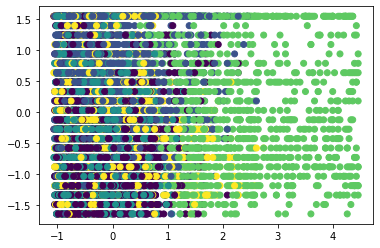

In [400]:
plt.scatter(X['training_hours'], X['experience'], c=cluster.labels_)
plt.show()

###4. Then, increase the number of clusters to 4 or 5 and build the clusters again and plot them again to see any difference.


In [401]:
cluster2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster2.fit_predict(X.drop(columns=['cluster_label', 'target_int']))

array([1, 1, 2, ..., 2, 1, 2])

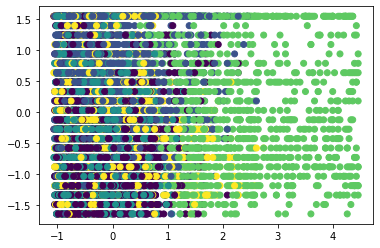

In [403]:
plt.scatter(X['training_hours'], X['experience'], c=cluster2.labels_)
plt.show()